In [130]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

from sklearn.linear_model import Perceptron#
from sklearn.linear_model import PassiveAggressiveClassifier#
from sklearn.linear_model import LogisticRegression#
from sklearn.tree import DecisionTreeClassifier#
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis#
from sklearn.model_selection import train_test_split,cross_validate, StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler

In [131]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/NAFLD/nafld1.csv")

In [132]:
std_columns = ['age', 'futime']
rb_columns = ['weight', 'height', 'bmi']
target_column = 'status'

In [133]:
df.isna().sum()

Unnamed: 0       0
id               0
age              0
male             0
weight        4786
height        3168
bmi           4961
case.id         31
futime           0
status           0
dtype: int64

In [134]:
df_original = df
df.drop('id', axis=1, inplace=True)
df.drop('case.id', axis=1, inplace=True)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.tail()

,age,male,weight,height,bmi,futime,status
17544,46,0,53.0,161.0,20.501023,1894,0
17545,52,1,111.8,154.0,47.335905,3841,0
17546,59,0,57.3,NaN,NaN,5081,0
17547,61,0,NaN,NaN,NaN,3627,1
17548,69,1,94.1,180.0,29.204650,2744,0


<Axes: xlabel='age', ylabel='Density'>

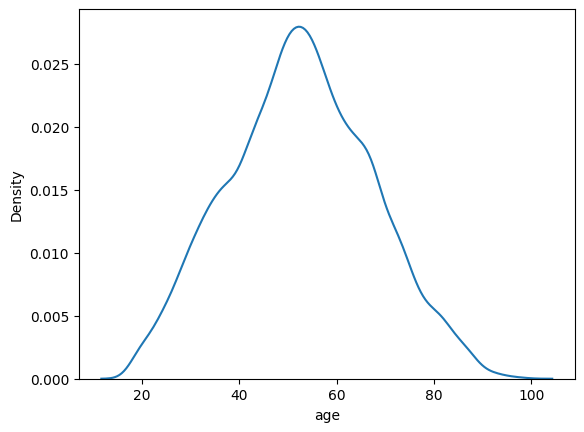

In [135]:
sns.kdeplot(data=df, x="age")

<Axes: xlabel='male', ylabel='count'>

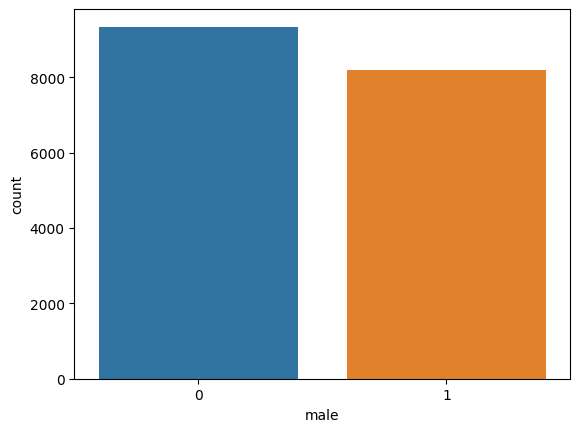

In [136]:
sns.countplot(x ='male', data = df)

<Axes: xlabel='male', ylabel='count'>

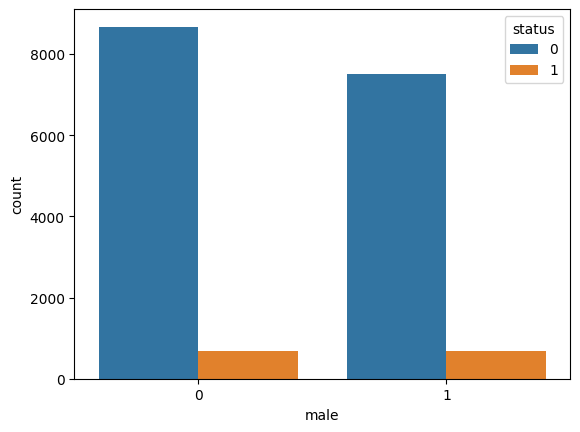

In [137]:
sns.countplot(data=df, x="male", hue="status")

<Axes: xlabel='age', ylabel='Density'>

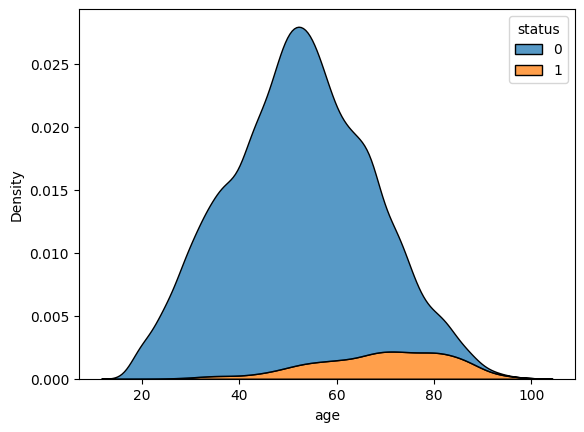

In [138]:
sns.kdeplot(data=df, x="age", hue="status", multiple="stack")

In [139]:
df.isnull().sum() / len(df) * 100

age        0.000000
male       0.000000
weight    27.272209
height    18.052311
bmi       28.269417
futime     0.000000
status     0.000000
dtype: float64

In [140]:
df['weight'].fillna(df['weight'].mean(), inplace=True)
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [141]:
df.status.value_counts(normalize=True)

0    0.922275
1    0.077725
Name: status, dtype: float64

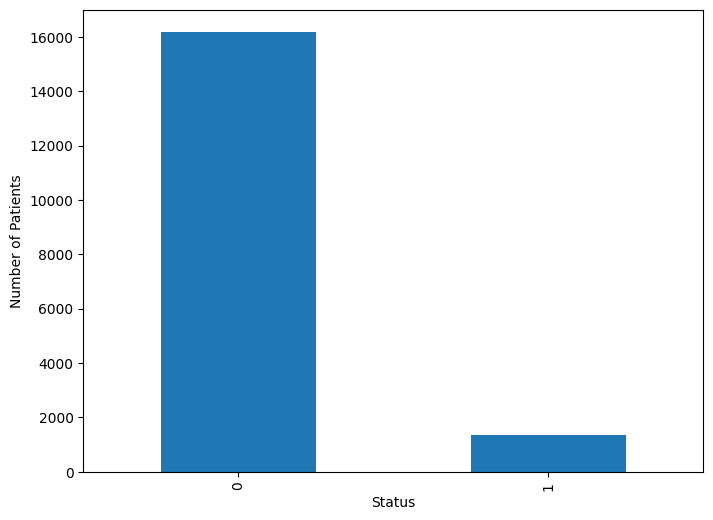

In [142]:
plt.figure(figsize=(8,6))
df.status.value_counts().plot(kind='bar')
plt.ylabel('Number of Patients')
plt.xlabel('Status')
plt.show()

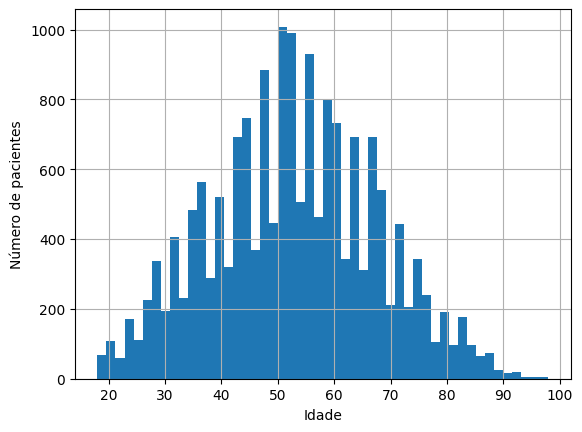

In [143]:
df['age'].hist(bins=50)
plt.xlabel('Idade')
plt.ylabel('Número de pacientes')
plt.show()

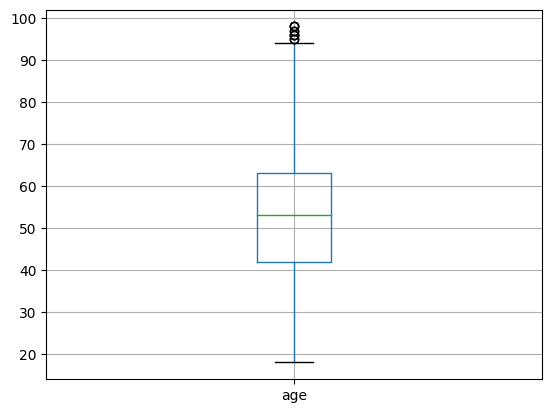

In [144]:
df.boxplot(column='age')
plt.show()

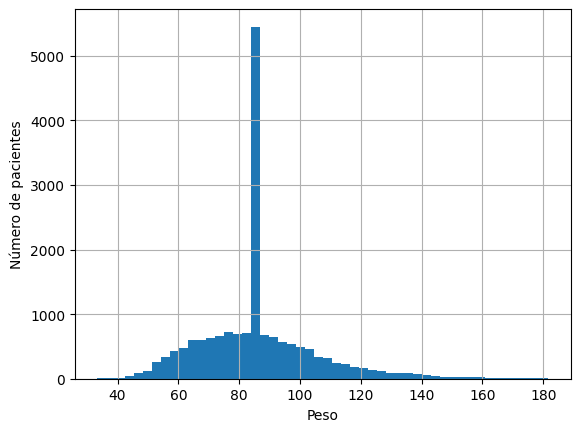

In [145]:
df['weight'].hist(bins=50)
plt.xlabel('Peso')
plt.ylabel('Número de pacientes')
plt.show()

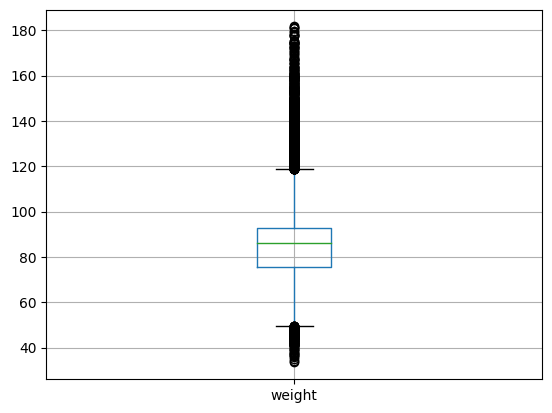

In [146]:
df.boxplot(column='weight')
plt.show()

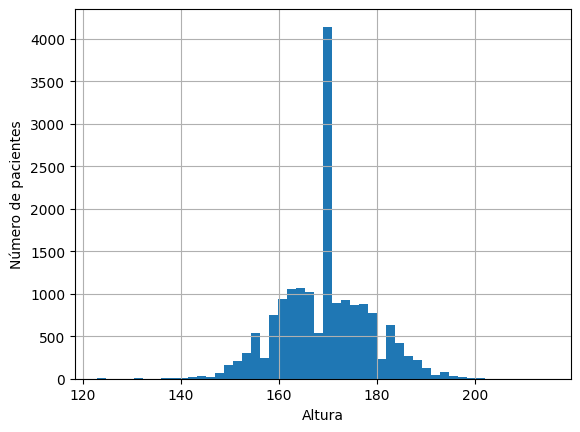

In [147]:
df['height'].hist(bins=50)
plt.xlabel('Altura')
plt.ylabel('Número de pacientes')
plt.show()

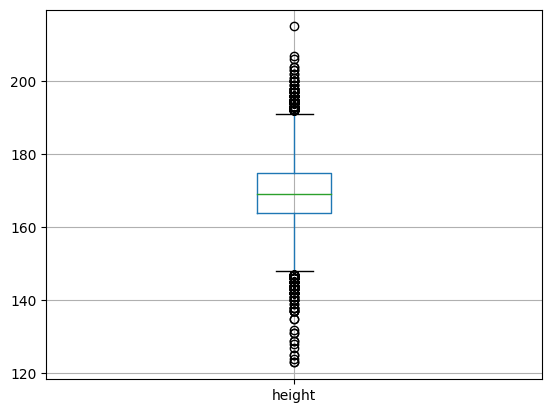

In [148]:
df.boxplot(column='height')
plt.show()

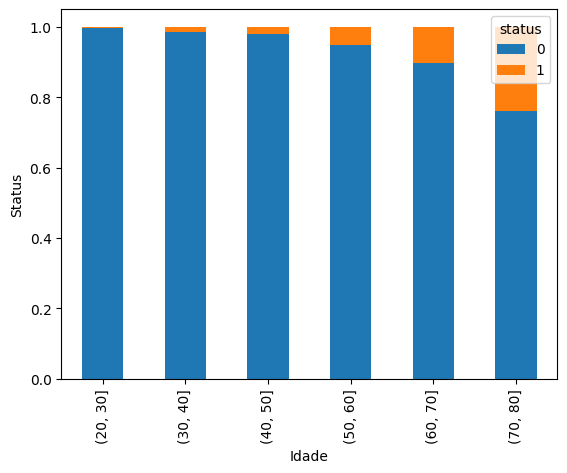

In [149]:
bins=[20,30,40,50,60,70,80]

df['extra_col']=pd.cut(df['age'],bins)
age=pd.crosstab(df['extra_col'],df['status'])
age.div(age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('Idade')
P = plt.ylabel('Status')

In [150]:
robust_scaler = RobustScaler()
df[rb_columns] = robust_scaler.fit_transform(df[rb_columns])

scaler = StandardScaler()
df[std_columns] = scaler.fit_transform(df[std_columns])

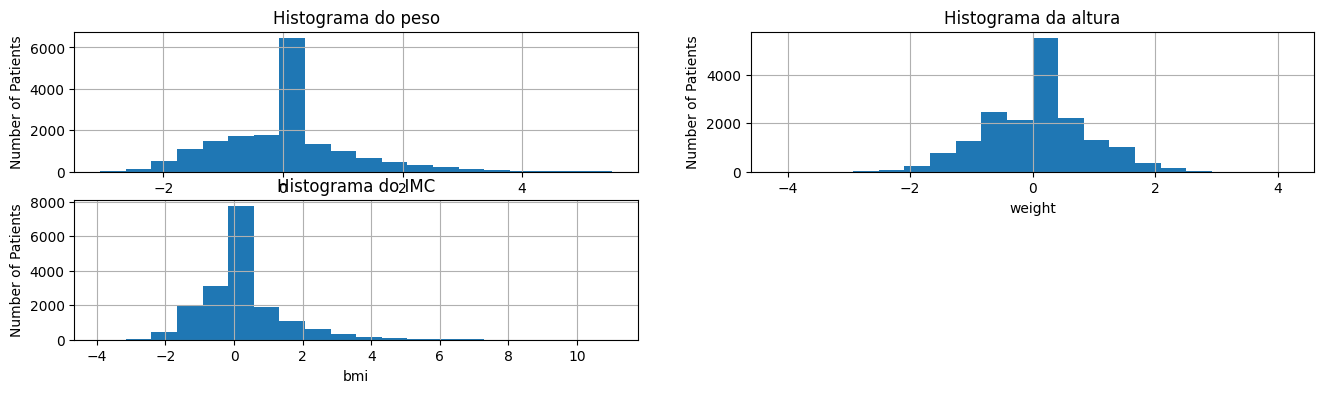

In [151]:
fig = plt.figure(figsize=(16,4))

#weight
weight = fig.add_subplot(2,2,1) # top left
weight.set_title("Histograma do peso")
weight.set_xlabel('weight')
weight.set_ylabel('Number of Patients')
df['weight'].hist(bins=20)

#height
height = fig.add_subplot(2,2,2) # top right
height.set_title("Histograma da altura")
height.set_xlabel('weight')
height.set_ylabel('Number of Patients')
df['height'].hist(bins=20)

#bmi
bmi = fig.add_subplot(2,2,3) # bottom left
bmi.set_title("Histograma do IMC")
bmi.set_xlabel('bmi')
bmi.set_ylabel('Number of Patients')
df['bmi'].hist(bins=20)

plt.show()

In [152]:
df[['weight', 'height','bmi']].min()

weight   -3.060887
height   -4.181818
bmi      -3.908419
dtype: float64

In [153]:
df['weight'] = np.log(df['weight']+4.07)
df['height'] = np.log(df['height']+5.19)
df['bmi'] = np.log(df['bmi']+4.91)

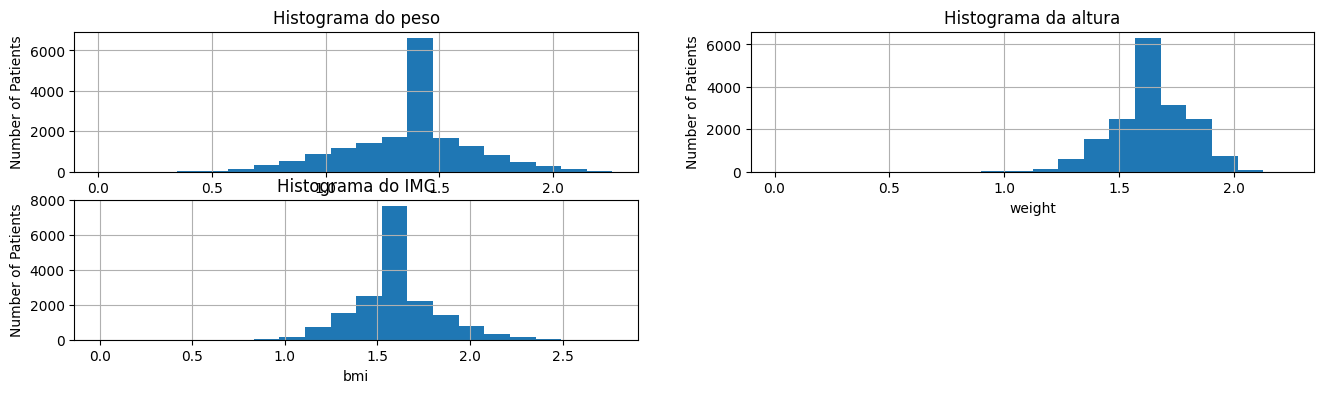

In [154]:
fig = plt.figure(figsize=(16,4))

#weight
weight = fig.add_subplot(2,2,1) # top left
weight.set_title("Histograma do peso")
weight.set_xlabel('weight')
weight.set_ylabel('Number of Patients')
df['weight'].hist(bins=20)

#height
height = fig.add_subplot(2,2,2) # top right
height.set_title("Histograma da altura")
height.set_xlabel('weight')
height.set_ylabel('Number of Patients')
df['height'].hist(bins=20)

#bmi
bmi = fig.add_subplot(2,2,3) # bottom left
bmi.set_title("Histograma do IMC")
bmi.set_xlabel('bmi')
bmi.set_ylabel('Number of Patients')
df['bmi'].hist(bins=20)

plt.show()

In [155]:
rb_preprocessor = Pipeline([
    ('robust_scaler', RobustScaler()),
])


std_preprocessor = Pipeline([
    ('standard_scaler', StandardScaler()),
])

In [156]:
preprocessing = ColumnTransformer([
    ('rb_transformer', rb_preprocessor, rb_columns),
    ('std_transformer', std_preprocessor, std_columns)
])

In [157]:
models = [
    (
        "Logistic Regr", #Nome do modelo (abreviado)
        LogisticRegression(solver='saga', max_iter=1000), # Chamada do método do modelo
        {"penalty": ['none', 'l1', 'l2']} # Diferentes parametros que serão testados
    ),(
        "KNN",
        KNeighborsClassifier(),
        {"n_neighbors":[2,5,10,15,20]}
    ),
    (
        "PassiveAggressiveClassifier",
        PassiveAggressiveClassifier(),
        {"random_state":[0],"tol":[1e-3]}
    ),
    (
        "DecisionTreeClassifier",
        DecisionTreeClassifier(),
        {}
    ),
    (
        "RandomForestClassifier",
        RandomForestClassifier(),
        {"max_depth":[2,4,6,8,10],"random_state":[0]}
    ),
    (
        "GradientBoostingClassifier",
        GradientBoostingClassifier(),
        {"n_estimators":[100],"learning_rate":[1.0],"max_depth":[1],"random_state":[0]}
    ),
    (
        "LinearDiscriminantAnalysis",
        LinearDiscriminantAnalysis(),
        {}
    ),
    (
        "QuadraticDiscriminantAnalysis",
        QuadraticDiscriminantAnalysis(),
        {}
    )
]

In [158]:
X = df.drop(columns=[target_column], axis=1)
y = df[[target_column]]

cv = StratifiedShuffleSplit(n_splits=30, train_size=0.8, random_state=42)

In [159]:
results = {}
for model_name, model, model_params in models:
    print(f'{model_name} run...')

    model_gs = GridSearchCV(model, model_params, scoring='accuracy')
    approach = Pipeline([
        ("preprocessing", preprocessing),
        ("model", model_gs)
    ])
    model_results = cross_validate(
        approach,
        X=X,
        y=y,
        scoring=['accuracy', 'f1', 'precision', 'recall'], #Critérios de avaliação
        cv=cv,
        n_jobs=-1,
        return_train_score=False
    )
    model_results['name'] = [model_name] * len(model_results['score_time'])
    if results:
        for key, value in model_results.items():
            results[key] = np.append(results[key], value)
    else:
        results = model_results

Logistic Regr run...
KNN run...
PassiveAggressiveClassifier run...
DecisionTreeClassifier run...
RandomForestClassifier run...
GradientBoostingClassifier run...
LinearDiscriminantAnalysis run...
QuadraticDiscriminantAnalysis run...


In [160]:
df_results = pd.DataFrame(results)
df_results.groupby('name').agg([np.mean, np.std])

fit_time           score_time            \
                                    mean       std       mean       std   
name                                                                      
DecisionTreeClassifier          0.830199  0.255541   0.062238  0.025652   
GradientBoostingClassifier      6.780271  1.103634   0.058060  0.020291   
KNN                             6.529115  1.123584   0.396118  0.123539   
LinearDiscriminantAnalysis      0.218083  0.014237   0.048533  0.007723   
Logistic Regr                   1.361003  0.334560   0.052621  0.019197   
PassiveAggressiveClassifier     0.194325  0.016565   0.054426  0.008873   
QuadraticDiscriminantAnalysis   0.226255  0.041643   0.086546  0.027319   
RandomForestClassifier         48.588447  1.666186   0.128157  0.050488   

                              test_accuracy             test_f1            \
                                       mean       std      mean       std   
name                                                                        
DecisionTreeClassifier             0.883913  0.004757  0.283620  0.022981   
GradientBoostingClassifier         0.920095  0.004852  0.259014  0.188023   
KNN                                0.925764  0.001644  0.164115  0.033512   
LinearDiscriminantAnalysis         0.926429  0.001242  0.166966  0.022070   
Logistic Regr                      0.926648  0.001185  0.177050  0.023215   
PassiveAggressiveClassifier        0.845774  0.074903  0.192624  0.117508   
QuadraticDiscriminantAnalysis      0.914530  0.002687  0.159314  0.019428   
RandomForestClassifier             0.928746  0.001733  0.262118  0.034910   

                              test_precision           test_recall            
                                        mean       std        mean       std  
name                                                                          
DecisionTreeClassifier              0.273039  0.021901    0.295726  0.028160  
GradientBoostingClassifier          0.323298  0.239912    0.222466  0.165643  
KNN                                 0.675571  0.090377    0.094383  0.022430  
LinearDiscriminantAnalysis          0.701961  0.063865    0.094994  0.013838  
Logistic Regr                       0.698767  0.061882    0.101709  0.014862  
PassiveAggressiveClassifier         0.293134  0.238498    0.298657  0.239971  
QuadraticDiscriminantAnalysis       0.341884  0.045681    0.104274  0.014030  
RandomForestClassifier              0.673110  0.039587    0.163492  0.026317

In [161]:
def highlight_max(s, props=''):
    values = [float(value.split()[0]) for value in s.values[1:]]
    result = [''] * len(s.values)
    if s.values[0].endswith('time'):
        result[np.argmin(values)+1] = props
    else:
        result[np.argmax(values)+1] = props
    return result

def get_winner(s):
    metric = s.values[0]
    values = [float(value.split()[0]) for value in s.values[1:]]
    models = results.columns[1:]

    if s.values[0].endswith('time'):
        return models[np.argmin(values)]
    else:
        return models[np.argmax(values)]

results = (
    pd
    .DataFrame(df_results)
    .groupby(['name'])
    .agg([lambda x: f"{np.mean(x):.3f} ± {np.std(x):.3f}"])#
    .transpose()
    .reset_index()
    .rename(columns={"level_0": "score"})
    .drop(columns="level_1")
    # .set_index('score')
)
time_scores = ['fit_time', 'score_time']
winner = results.query('score not in @time_scores').apply(get_winner, axis=1).value_counts().index[0]
results.columns.name = ''
results = (
    results
    .style
    .hide(axis='index')
    .apply(highlight_max, props='color:white;background-color:gray', axis=1)
)
display(results)
display(Markdown(f'### O melhor modelo é o : **{winner}**'))

score,DecisionTreeClassifier,GradientBoostingClassifier,KNN,LinearDiscriminantAnalysis,Logistic Regr,PassiveAggressiveClassifier,QuadraticDiscriminantAnalysis,RandomForestClassifier
fit_time,0.830 ± 0.251,6.780 ± 1.085,6.529 ± 1.105,0.218 ± 0.014,1.361 ± 0.329,0.194 ± 0.016,0.226 ± 0.041,48.588 ± 1.638
score_time,0.062 ± 0.025,0.058 ± 0.020,0.396 ± 0.121,0.049 ± 0.008,0.053 ± 0.019,0.054 ± 0.009,0.087 ± 0.027,0.128 ± 0.050
test_accuracy,0.884 ± 0.005,0.920 ± 0.005,0.926 ± 0.002,0.926 ± 0.001,0.927 ± 0.001,0.846 ± 0.074,0.915 ± 0.003,0.929 ± 0.002
test_f1,0.284 ± 0.023,0.259 ± 0.185,0.164 ± 0.033,0.167 ± 0.022,0.177 ± 0.023,0.193 ± 0.116,0.159 ± 0.019,0.262 ± 0.034
test_precision,0.273 ± 0.022,0.323 ± 0.236,0.676 ± 0.089,0.702 ± 0.063,0.699 ± 0.061,0.293 ± 0.234,0.342 ± 0.045,0.673 ± 0.039
test_recall,0.296 ± 0.028,0.222 ± 0.163,0.094 ± 0.022,0.095 ± 0.014,0.102 ± 0.015,0.299 ± 0.236,0.104 ± 0.014,0.163 ± 0.026


### O melhor modelo é o : **RandomForestClassifier**

In [162]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        17549 non-null  float64 
 1   male       17549 non-null  int64   
 2   weight     17549 non-null  float64 
 3   height     17549 non-null  float64 
 4   bmi        17549 non-null  float64 
 5   futime     17549 non-null  float64 
 6   status     17549 non-null  int64   
 7   extra_col  16830 non-null  category
dtypes: category(1), float64(5), int64(2)
memory usage: 977.2 KB


In [163]:
#UnderSampling
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(X, y)

#OverSampling
ros = RandomOverSampler(random_state = 32)
X_over, y_over = ros.fit_resample(X, y)

In [164]:
results_under = {}
for model_name, model, model_params in models:
    print(f'{model_name} run...')

    model_gs = GridSearchCV(model, model_params, scoring='accuracy')
    approach = Pipeline([
        ("preprocessing", preprocessing),
        ("model", model_gs)
    ])
    model_results = cross_validate(
        approach,
        X=x_resampled,
        y=y_resampled,
        scoring=['accuracy', 'f1', 'precision', 'recall'], #Critérios de avaliação
        cv=cv,
        n_jobs=-1,
        return_train_score=False
    )
    model_results['name'] = [model_name] * len(model_results['score_time'])
    if results_under:
        for key, value in model_results.items():
            results_under[key] = np.append(results_under[key], value)
    else:
        results_under = model_results

Logistic Regr run...
KNN run...
PassiveAggressiveClassifier run...
DecisionTreeClassifier run...
RandomForestClassifier run...
GradientBoostingClassifier run...
LinearDiscriminantAnalysis run...
QuadraticDiscriminantAnalysis run...


In [165]:
df_results_under = pd.DataFrame(results_under)
df_results_under.groupby('name').agg([np.mean, np.std])

fit_time           score_time            \
                                    mean       std       mean       std   
name                                                                      
DecisionTreeClassifier          0.139988  0.005454   0.047290  0.006313   
GradientBoostingClassifier      1.731787  0.476231   0.053651  0.017827   
KNN                             1.168744  0.276014   0.104264  0.036744   
LinearDiscriminantAnalysis      0.095668  0.007194   0.041869  0.004856   
Logistic Regr                   0.411801  0.031902   0.049996  0.010258   
PassiveAggressiveClassifier     0.174796  0.043309   0.075223  0.023909   
QuadraticDiscriminantAnalysis   0.079781  0.008700   0.043665  0.004985   
RandomForestClassifier         14.126039  0.627513   0.072889  0.019941   

                              test_accuracy             test_f1            \
                                       mean       std      mean       std   
name                                                                        
DecisionTreeClassifier             0.671123  0.021002  0.672006  0.024268   
GradientBoostingClassifier         0.743101  0.019918  0.736581  0.020122   
KNN                                0.731990  0.016447  0.719394  0.018225   
LinearDiscriminantAnalysis         0.738217  0.017835  0.739847  0.017423   
Logistic Regr                      0.738706  0.018342  0.739125  0.018058   
PassiveAggressiveClassifier        0.629426  0.079786  0.606550  0.145461   
QuadraticDiscriminantAnalysis      0.735958  0.018290  0.728307  0.019632   
RandomForestClassifier             0.745665  0.020251  0.729558  0.021978   

                              test_precision           test_recall            
                                        mean       std        mean       std  
name                                                                          
DecisionTreeClassifier              0.669994  0.020375    0.674725  0.035232  
GradientBoostingClassifier          0.756161  0.024182    0.718437  0.024273  
KNN                                 0.755197  0.021952    0.687546  0.026920  
LinearDiscriminantAnalysis          0.735661  0.021095    0.744567  0.022965  
Logistic Regr                       0.738337  0.021741    0.740415  0.023636  
PassiveAggressiveClassifier         0.647631  0.129588    0.620513  0.213873  
QuadraticDiscriminantAnalysis       0.750445  0.023817    0.708181  0.027752  
RandomForestClassifier              0.779485  0.028727    0.686447  0.028756

In [166]:
results_under = (
    pd
    .DataFrame(df_results_under)
    .groupby(['name'])
    .agg([lambda x: f"{np.mean(x):.3f} ± {np.std(x):.3f}"])#
    .transpose()
    .reset_index()
    .rename(columns={"level_0": "score"})
    .drop(columns="level_1")
    # .set_index('score')
)
time_scores = ['fit_time', 'score_time']
winner = results_under.query('score not in @time_scores').apply(get_winner, axis=1).value_counts().index[0]
results_under.columns.name = ''
results_under = (
    results_under
    .style
    .hide(axis='index')
    .apply(highlight_max, props='color:white;background-color:gray', axis=1)
)
display(results_under)
display(Markdown(f'### O melhor modelo é o : **{winner}**'))

score,DecisionTreeClassifier,GradientBoostingClassifier,KNN,LinearDiscriminantAnalysis,Logistic Regr,PassiveAggressiveClassifier,QuadraticDiscriminantAnalysis,RandomForestClassifier
fit_time,0.140 ± 0.005,1.732 ± 0.468,1.169 ± 0.271,0.096 ± 0.007,0.412 ± 0.031,0.175 ± 0.043,0.080 ± 0.009,14.126 ± 0.617
score_time,0.047 ± 0.006,0.054 ± 0.018,0.104 ± 0.036,0.042 ± 0.005,0.050 ± 0.010,0.075 ± 0.024,0.044 ± 0.005,0.073 ± 0.020
test_accuracy,0.671 ± 0.021,0.743 ± 0.020,0.732 ± 0.016,0.738 ± 0.018,0.739 ± 0.018,0.629 ± 0.078,0.736 ± 0.018,0.746 ± 0.020
test_f1,0.672 ± 0.024,0.737 ± 0.020,0.719 ± 0.018,0.740 ± 0.017,0.739 ± 0.018,0.607 ± 0.143,0.728 ± 0.019,0.730 ± 0.022
test_precision,0.670 ± 0.020,0.756 ± 0.024,0.755 ± 0.022,0.736 ± 0.021,0.738 ± 0.021,0.648 ± 0.127,0.750 ± 0.023,0.779 ± 0.028
test_recall,0.675 ± 0.035,0.718 ± 0.024,0.688 ± 0.026,0.745 ± 0.023,0.740 ± 0.023,0.621 ± 0.210,0.708 ± 0.027,0.686 ± 0.028


### O melhor modelo é o : **RandomForestClassifier**

In [167]:
# results_over = {}
# for model_name, model, model_params in models:
#     print(f'{model_name} run...')

#     model_gs = GridSearchCV(model, model_params, scoring='accuracy')
#     approach = Pipeline([
#         ("preprocessing", preprocessing),
#         ("model", model_gs)
#     ])
#     model_results = cross_validate(
#         approach,
#         X=X_over,
#         y=y_over,
#         scoring=['accuracy', 'f1', 'precision', 'recall'], #Critérios de avaliação
#         cv=cv,
#         n_jobs=-1,
#         return_train_score=False
#     )
#     model_results['name'] = [model_name] * len(model_results['score_time'])
#     if results_over:
#         for key, value in model_results.items():
#             results_over[key] = np.append(results_over[key], value)
#     else:
#         results_over = model_results

In [168]:
# df_results_over = pd.DataFrame(results_over)
# df_results_over.groupby('name').agg([np.mean, np.std])

In [169]:
# results_over = (
#     pd
#     .DataFrame(df_results_over)
#     .groupby(['name'])
#     .agg([lambda x: f"{np.mean(x):.3f} ± {np.std(x):.3f}"])#
#     .transpose()
#     .reset_index()
#     .rename(columns={"level_0": "score"})
#     .drop(columns="level_1")
#     # .set_index('score')
# )
# time_scores = ['fit_time', 'score_time']
# winner = results_over.query('score not in @time_scores').apply(get_winner, axis=1).value_counts().index[0]
# results_over.columns.name = ''
# results_over = (
#     results_over
#     .style
#     .hide(axis='index')
#     .apply(highlight_max, props='color:white;background-color:gray', axis=1)
# )
# display(results_over)
# display(Markdown(f'### O melhor modelo é o : **{winner}**'))